#  Aprendizaje no supervisado
El aprendizaje no supervisado es un tipo de aprendizaje automático (machine learning) en el que un modelo analiza y encuentra patrones en datos que no están etiquetados. Es decir, a diferencia del aprendizaje supervisado, en el aprendizaje no supervisado no se le dice al modelo cuál es la "respuesta correcta"; el modelo debe descubrir por sí mismo la estructura oculta de los datos.

En este trabajo se aplican **técnicas de aprendizaje no supervisado** para analizar un conjunto de datos de clientes mayoristas, con el propósito de **identificar patrones de consumo, relaciones latentes y posibles estructuras de segmentación** dentro de los datos.

El enfoque metodológico combina distintas herramientas estadísticas y computacionales que permiten explorar los datos desde diferentes perspectivas:

- **Análisis de Componentes Principales (PCA):** utilizado para **reducir la dimensionalidad** del conjunto de datos, maximizando la varianza explicada y facilitando la visualización de la estructura interna sin pérdida significativa de información.
- **K-Means:** implementado como método de **agrupamiento o clustering**, buscando particionar las observaciones en grupos homogéneos de acuerdo con sus características de consumo.
- **Selección de Características:** aplicada para **simplificar el modelo** eliminando variables redundantes o altamente correlacionadas, con el fin de mejorar la eficiencia del análisis y la interpretabilidad de los resultados.

Para evaluar la robustez del procedimiento, se trabajó con **tres versiones del conjunto de datos**:

1. **Conjunto original**, con todas las variables disponibles.  
2. **Conjunto reducido mediante PCA**, limitado a **dos componentes principales** que concentran la mayor parte de la información relevante.  
3. **Conjunto depurado**, tras la **eliminación de variables redundantes** identificadas por alta correlación.

Este diseño analítico permite comparar el rendimiento y la estabilidad de los agrupamientos bajo distintos niveles de complejidad, ofreciendo una visión más profunda sobre la estructura latente del comportamiento de los clientes.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier

##  1. Exploración y limpieza básica
Se inicia con la carga y exploración básica del dataset. Como paso fundamental antes de aplicar PCA y K-means, se estandarizan todas las variables numéricas para que tengan media 0 y desviación estándar 1.

In [2]:
datos = pd.read_csv("Wholesale customers data.csv")

In [3]:
datos.head

<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

In [4]:
datos.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

El conjunto de datos **Wholesale Customers Data** recopila información detallada sobre **clientes mayoristas de una empresa distribuidora de productos alimenticios**, proporcionando una base sólida para el análisis de sus patrones de compra y la identificación de perfiles de consumo diferenciados.  
Su estructura permite aplicar técnicas de **aprendizaje no supervisado** para descubrir comportamientos comunes y segmentar a los clientes de acuerdo con sus hábitos de gasto.

---

###  **Columnas del Dataset**

| **Variable**         | **Descripción**                                                                                  |
|----------------------|--------------------------------------------------------------------------------------------------|
| `Channel`            | Tipo de canal comercial del cliente: **1 = Horeca (Hoteles, Restaurantes y Cafés)**, **2 = Retail**. |
| `Region`             | Región geográfica del cliente: **1 = Lisboa**, **2 = Oporto**, **3 = Otra región**.              |
| `Fresh`              | Gasto anual (en unidades monetarias) en **productos frescos**.                                   |
| `Milk`               | Gasto anual en **productos lácteos**.                                                            |
| `Grocery`            | Gasto anual en **productos de abarrotes o comestibles**.                                         |
| `Frozen`             | Gasto anual en **productos congelados**.                                                         |
| `Detergents_Paper`   | Gasto anual en **productos de limpieza y papel**.                                                |
| `Delicatessen`       | Gasto anual en **productos delicatessen o gourmet**.                                             |

---

###  **Objetivo del Análisis**

El propósito principal de este estudio es **identificar agrupamientos naturales de clientes** según sus patrones de consumo, aplicando técnicas de aprendizaje no supervisado.  
Este enfoque analítico permite extraer información valiosa para la **toma de decisiones estratégicas**, particularmente en las áreas de:

- **Segmentación de mercado:** identificación de grupos homogéneos de clientes con comportamientos de compra similares.  
- **Optimización comercial:** diseño de **estrategias de marketing personalizadas** y promociones focalizadas.  
- **Eficiencia logística:** mejora en la **planificación de distribución y abastecimiento**, ajustando la oferta a las necesidades específicas de cada segmento.  

En síntesis, este conjunto de datos sirve como una **base empírica para comprender la estructura del mercado mayorista** y potenciar la eficiencia operativa y comercial mediante la analítica de datos.


In [ ]:
datos.select_dtypes(include=[np.number])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
print("Variables numéricas:", datos.columns.tolist())

Variables numéricas: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


##  2. Estandarización y PCA
Se aplica PCA al conjunto de datos estandarizado con el objetivo de reducir su dimensionalidad y observar cuánta varianza explica cada componente.

In [ ]:
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos)

In [8]:
# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(datos_scaled)

##  3. Scree plot
Se genera un **scree plot** para visualizar el porcentaje de varianza explicada por cada componente principal. Luego, se seleccionan las **2 primeras componentes**, y se representa gráficamente el resultado en un diagrama de dispersión para observar si se forman agrupamientos naturales.

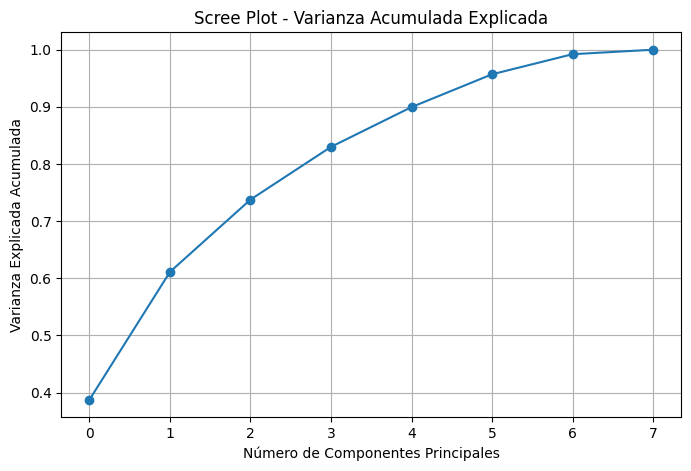

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Scree Plot - Varianza Acumulada Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

##  4. Reducción a 2 componentes principales

In [ ]:
pca_2 = PCA(n_components=2)
datos_pca_2 = pca_2.fit_transform(datos_scaled)

##  5. Diagrama de dispersión

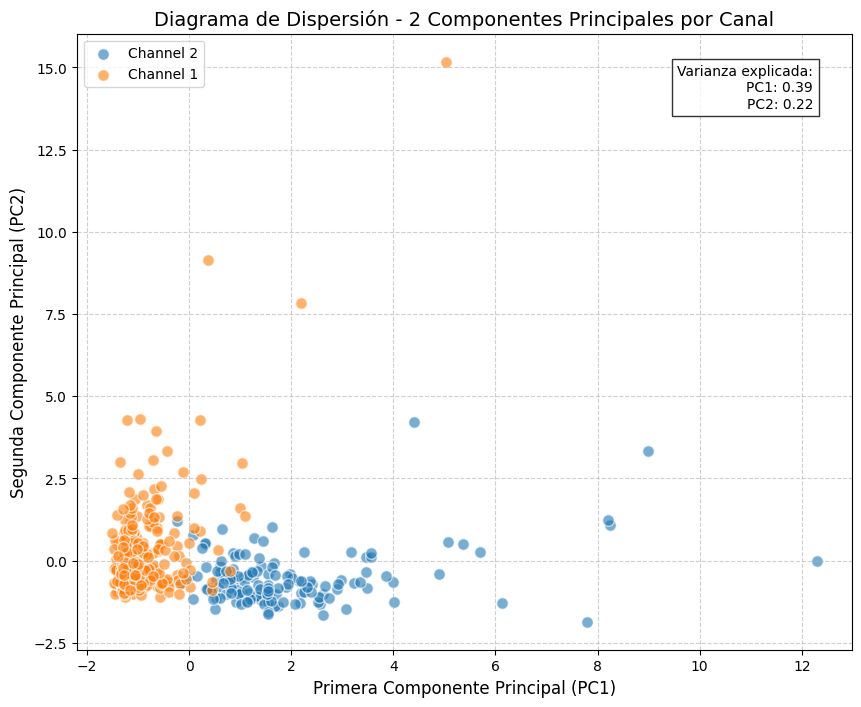

In [ ]:
if 'Channel' in datos.columns:
    plt.figure(figsize=(10, 8))
    
    for channel in datos['Channel'].unique():
        mask = datos['Channel'] == channel
        plt.scatter(datos_pca_2[mask, 0], datos_pca_2[mask, 1], 
                    alpha=0.6, edgecolors='w', s=70, 
                    label=f'Channel {channel}')
    
    plt.title('Diagrama de Dispersión - 2 Componentes Principales por Canal', fontsize=14)
    plt.xlabel('Primera Componente Principal (PC1)', fontsize=12)
    plt.ylabel('Segunda Componente Principal (PC2)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Mostrar varianza explicada
    plt.text(0.95, 0.95, f'Varianza explicada:\nPC1: {pca_2.explained_variance_ratio_[0]:.2f}\nPC2: {pca_2.explained_variance_ratio_[1]:.2f}',
             transform=plt.gca().transAxes, ha='right', va='top',
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

##  **6. Selección de Variables por Correlación**

Se aplicó un **análisis de correlación** con el fin de **identificar y eliminar variables altamente correlacionadas** (coeficiente de correlación superior a **0.85**).  
El objetivo de este procedimiento es **reducir la redundancia informativa** del conjunto de datos, conservando únicamente aquellas variables que aportan información verdaderamente diferenciada.

Este enfoque contribuye a:

- **Simplificar el modelo**, al disminuir la dimensionalidad del dataset.  
- **Reducir el ruido estadístico**, evitando que variables redundantes distorsionen los resultados.  
- **Mejorar la interpretabilidad** del análisis, sin comprometer la capacidad explicativa del modelo.  

En síntesis, la selección de variables basada en correlación permite optimizar el desempeño del modelo y fortalecer la validez de las conclusiones al mantener solo los atributos con mayor valor informativo.


In [ ]:
correlation_matrix = datos.corr().abs()

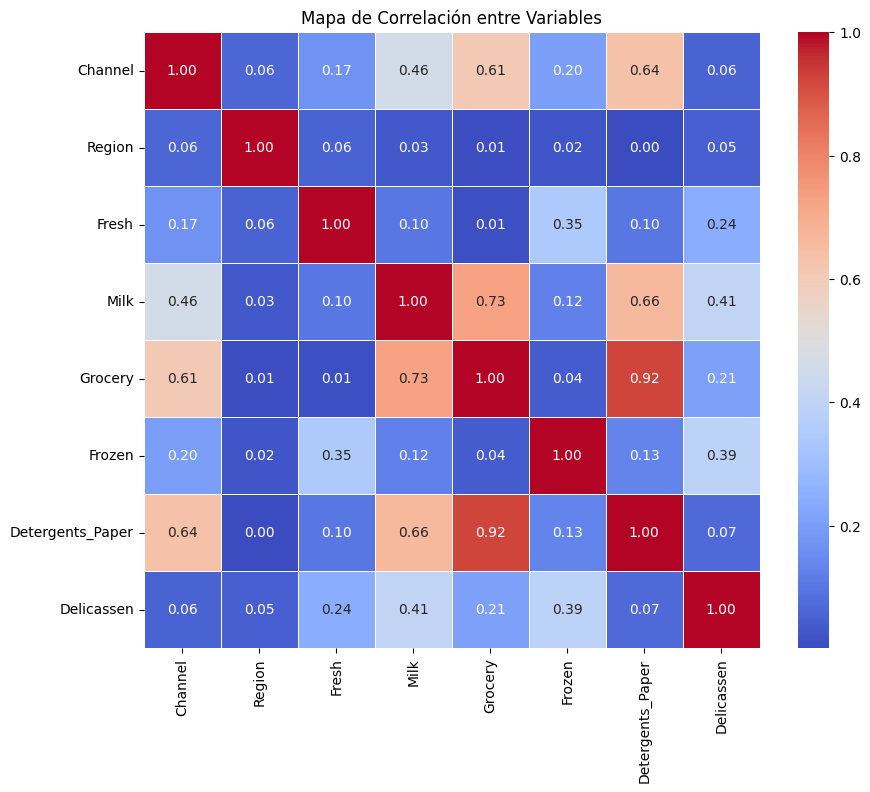

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title("Mapa de Correlación entre Variables")
plt.show()

Se generó un mapa de correlación para analizar la relación entre las variables numéricas. Aquellas con una correlación mayor a 0.85 fueron eliminadas por aportar información redundante. Esta técnica de selección de variables mejora la eficiencia de los algoritmos sin comprometer significativamente la calidad del análisis.

In [15]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
variables_a_eliminar = [column for column in upper.columns if any(upper[column] > 0.85)]

In [ ]:
datos_reducido = datos.drop(columns=variables_a_eliminar)

In [ ]:
print("Variables eliminadas por alta correlación (> 0.85):", variables_a_eliminar)
print("Variables restantes:", datos_reducido.columns.tolist())

Variables eliminadas por alta correlación (> 0.85): ['Detergents_Paper']
Variables restantes: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']


#  **7. Aplicación del Algoritmo K-Means en Tres Versiones del Dataset**

Se implementó el algoritmo de **agrupamiento K-Means** con el fin de segmentar a los clientes en función de sus patrones de consumo.  
Para evaluar la estabilidad y consistencia de los resultados, el análisis se realizó sobre **tres configuraciones distintas del conjunto de datos**:

1. **Versión original:** incluye todas las variables previamente estandarizadas mediante *StandardScaler*.  
2. **Versión reducida por PCA:** utiliza únicamente **dos componentes principales**, concentrando la mayor parte de la varianza explicada.  
3. **Versión depurada:** corresponde al conjunto ajustado tras **eliminar las variables altamente correlacionadas**, reduciendo la redundancia y el ruido.

Para cada versión se probaron valores de **K** entre **2 y 6**, buscando determinar el número óptimo de *clusters* mediante dos criterios complementarios:

- **Método del codo (Elbow Method):** permite identificar visualmente el punto donde la ganancia marginal en la reducción de inercia empieza a disminuir, indicando un equilibrio adecuado entre cohesión y separación.  
- **Coeficiente de silueta (Silhouette Score):** mide la **coherencia interna de los clusters**, tomando valores entre **-1 y 1**. Cuanto más cercano a 1, mejor definida está la segmentación.

Este procedimiento asegura una **evaluación robusta del agrupamiento**, comparando cómo la dimensionalidad y la selección de variables influyen en la calidad y estabilidad de los clusters formados.


In [ ]:
def evaluar_kmeans(nombre, data):
    print(f"\n Evaluando K-means en: {nombre}")
    
    inercia = []
    sil_scores = []
    Ks = range(2, 7)
    
    for k in Ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        etiquetas = kmeans.fit_predict(data)
        inercia.append(kmeans.inertia_)
        score = silhouette_score(data, etiquetas)
        sil_scores.append(score)
        print(f"K = {k} | Silhouette Score = {score:.4f}")
    
    # Gráficos dentro de la función
    plt.figure(figsize=(12, 5))

    # Gráfico del codo
    plt.subplot(1, 2, 1)
    plt.plot(Ks, inercia, marker='o')
    plt.title(f'Método del Codo - {nombre}')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inercia')
    plt.grid(True)

    # Gráfico de silhouette
    plt.subplot(1, 2, 2)
    plt.plot(Ks, sil_scores, marker='s', color='green')
    plt.title(f'Silhouette Score - {nombre}')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


📊 Evaluando K-means en: Datos Originales
K = 2 | Silhouette Score = 0.5115
K = 3 | Silhouette Score = 0.4630
K = 4 | Silhouette Score = 0.3345
K = 5 | Silhouette Score = 0.3763
K = 6 | Silhouette Score = 0.3695


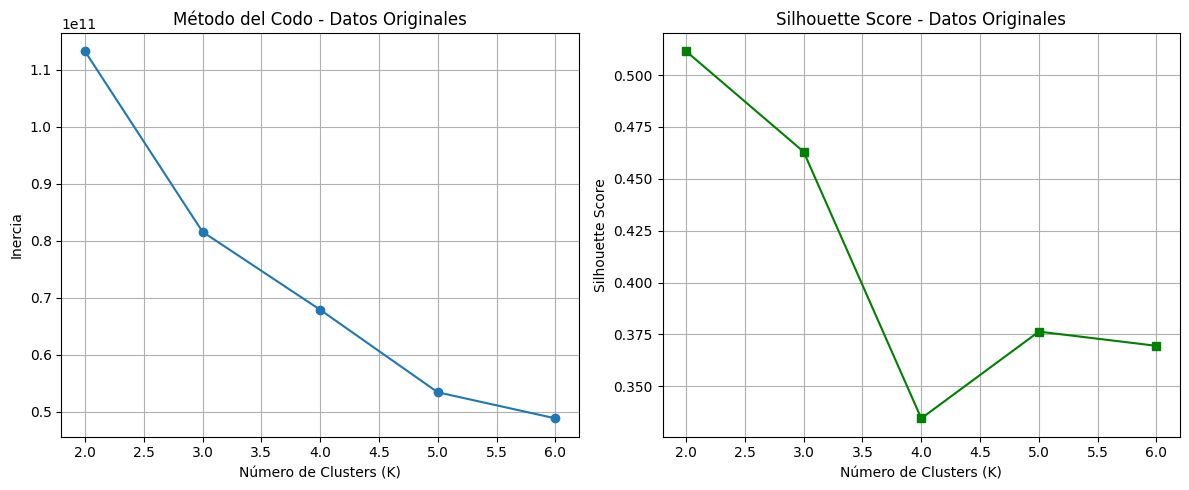

In [ ]:
# Dataset original
evaluar_kmeans("Datos Originales", datos)


📊 Evaluando K-means en: PCA - 2 Componentes
K = 2 | Silhouette Score = 0.5453
K = 3 | Silhouette Score = 0.5490
K = 4 | Silhouette Score = 0.5488
K = 5 | Silhouette Score = 0.5320
K = 6 | Silhouette Score = 0.5248


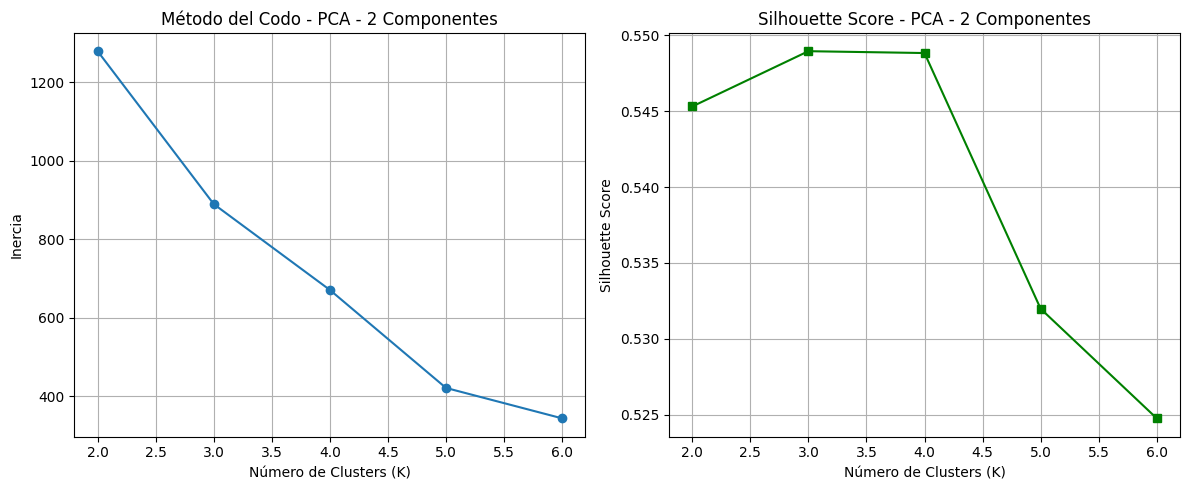

In [20]:
# Dataset con PCA a 2 componentes
evaluar_kmeans("PCA - 2 Componentes", datos_pca_2)


📊 Evaluando K-means en: Datos Reducidos por Correlación
K = 2 | Silhouette Score = 0.5228
K = 3 | Silhouette Score = 0.4748
K = 4 | Silhouette Score = 0.3513
K = 5 | Silhouette Score = 0.3801
K = 6 | Silhouette Score = 0.3307


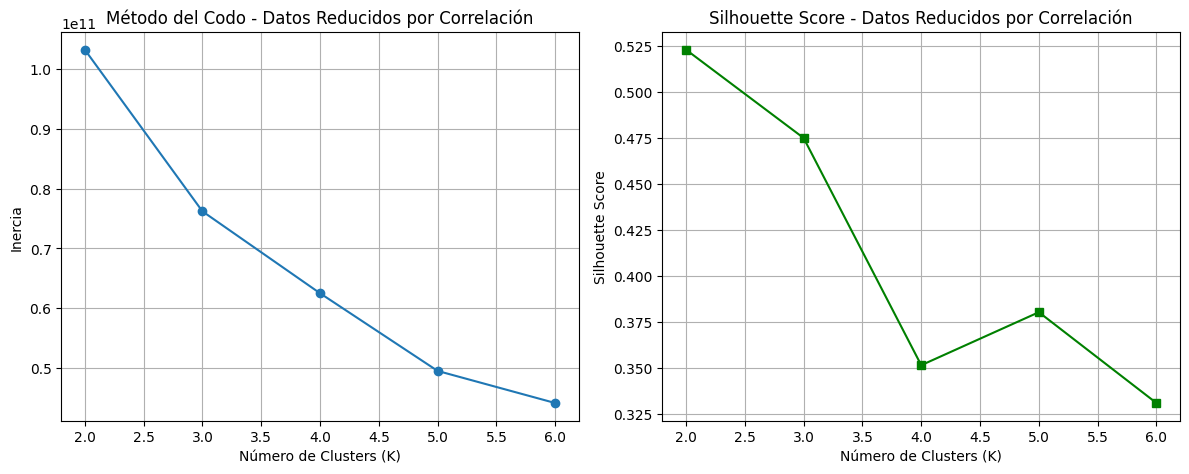

In [21]:
# Dataset reducido tras selección por correlación
evaluar_kmeans("Datos Reducidos por Correlación", datos_reducido)

##  **Comparación de Resultados: K-Means en los Tres Enfoques Analíticos**

| **Versión del Dataset**       | **Mejor K** | **Mejor Silhouette Score** | **Observaciones Clave**                                                                 |
|-------------------------------|-------------|-----------------------------|------------------------------------------------------------------------------------------|
| **Original**                  | 2           | 0.5115                      | Agrupamientos aceptables, aunque la calidad del clustering disminuye rápidamente para valores de K superiores a 2. |
| **PCA (2 componentes)**       | 3           | **0.5490**                  | Presenta la mejor definición de grupos, con fronteras más claras y separables visualmente. La reducción de dimensionalidad facilita la interpretación. |
| **Reducido por correlación**  | 2           | 0.5228                      | Mantiene un buen equilibrio entre simplicidad y capacidad explicativa, conservando variables reales y alcanzando una separación inicial sólida. |

---

###  **Conclusiones Finales**

- El **mejor desempeño general** se obtuvo con la versión **reducida mediante PCA**, que alcanzó el *silhouette score* más alto y una estructura de clusters bien definida, combinando simplicidad con representatividad.  
- El **dataset reducido por correlación** también mostró un **buen nivel de cohesión interna**, especialmente para K=2, aunque su desempeño decreció con valores mayores de K, lo que sugiere una estructura de datos menos compleja.  
- El **conjunto original**, si bien logra agrupamientos razonables, presenta **menor estabilidad y mayor riesgo de sobreajuste**, dado que la alta dimensionalidad puede introducir ruido e interferir con la precisión del algoritmo.

 la reducción de dimensionalidad mediante **PCA** se confirma como la estrategia más eficiente para representar la estructura subyacente de los datos y optimizar el rendimiento del algoritmo **K-Means**.


##  **Conclusiones Finales Específicas al Dataset de Clientes Mayoristas**

1. **Segmentación Natural con K = 2:**  
   - En los tres enfoques analizados (dataset original, reducción por PCA y eliminación por correlación), el valor **K = 2** obtuvo el mejor o segundo mejor *Silhouette Score*.  
   - Este hallazgo sugiere una **segmentación natural del mercado mayorista en dos grandes grupos** de clientes, posiblemente diferenciados por su **nivel de gasto y patrón de consumo**:  
     - Un grupo de **clientes de alto consumo**, caracterizado por mayores compras en múltiples categorías (por ejemplo, establecimientos tipo *retail* u *horeca*).  
     - Otro grupo con **consumo más acotado o especializado**, centrado en productos específicos o de menor volumen.  

2. **Mayor rendimiento mediante reducción de dimensionalidad (PCA):**  
   - El enfoque basado en **PCA con dos componentes principales** alcanzó el *Silhouette Score* más alto (**0.5490 con K = 3**), evidenciando que la **reducción de dimensionalidad mejora la estructura interna del modelo de agrupamiento**.  
   - Este procedimiento permitió **eliminar ruido estadístico y redundancia informativa**, al tiempo que conservó la esencia de las relaciones entre variables. Además, facilitó la **visualización y diferenciación clara de los clusters**, lo que es especialmente relevante para análisis descriptivos y de segmentación de mercado.

3. **Relevancia económica de las variables correlacionadas:**  
   - La exclusión de variables altamente correlacionadas —como *Grocery* y *Detergents_Paper*— mantuvo una **alta calidad en los resultados de clustering**, aun con menor dimensionalidad.  
   - Desde una perspectiva econométrica, esto implica que dichas variables contienen **información redundante** y su eliminación **no reduce la capacidad explicativa del modelo**, mejorando su parsimonia.  
   - En términos de análisis económico, la identificación de colinealidad entre categorías de gasto permite **optimizar modelos de segmentación**, concentrando la atención en las variables verdaderamente representativas del comportamiento del consumidor.

4. **Aplicabilidad práctica y valor económico:**  
   - Los resultados obtenidos ofrecen un **insumo valioso para la gestión comercial y la toma de decisiones estratégicas**, en particular para:  
     - **Diseñar políticas de precios y estrategias de marketing diferenciadas** según el perfil de cliente.  
     - **Optimizar la cadena logística e inventarios**, adaptando la oferta a los patrones de demanda identificados.  
     - **Detectar comportamientos atípicos o desviaciones de consumo**, útiles para el control de riesgos o la detección de oportunidades de negocio.

---

###  **Conclusión General**

El análisis demuestra que la **segmentación de clientes mayoristas mediante aprendizaje no supervisado** constituye una herramienta eficaz para **extraer información económica significativa** a partir de grandes volúmenes de datos.  
La aplicación de **PCA** y la eliminación de variables correlacionadas permiten **mejorar la eficiencia y robustez econométrica del modelo**, revelando patrones de consumo con alto valor interpretativo.  

En síntesis, el estudio confirma que los métodos no supervisados —complementados con técnicas de reducción de dimensionalidad— pueden **potenciar el análisis de mercados, la planificación estratégica y la personalización de políticas comerciales**, contribuyendo a una gestión más eficiente y basada en evidencia empírica.
